### Logistic Regression Classifier in Python - Basic Introduction



In logistic regression... basically, you are performing linear regression but applying a sigmoid function for the outcome.

#### Sigmoid  / Logistic Function

$p =1 / 1 + e^{-y}$

#### Properties of Logistic Regression

* The dependent variable follows a Bernoulli Distribution
* Estimation is maximum likelihood estimation (MLE)

#### Advantages
* Straight forward, easy to implement, doesn't require high compute power, easy to interpret, used widely. 
* Doesn't require feature scaling and provides a probability score for observations.

#### Disadvantages
* Not able to handle a large number of category features/variables. 
* Vulnerable to overfitting. 


#### Data
Is the candy chocolate?  Let's find out because... yum 

(This intro was built on a candy-data.csv dataset in DataScience folder also found at

https://github.com/fivethirtyeight/data/blob/master/candy-power-ranking/candy-data.csv )

In [1]:
# Import libraries, features and settings (not all of these are needed so pull what you need)

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import io
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn import preprocessing
plt.rc("font", size = 14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
sns.set(style="white")
sns.set(style="whitegrid", color_codes = True)

In [4]:
# Explore data

df = pd.read_csv('covid_data.csv')
df = df[['Covid-19','Age','Temp(f)','Pulse(bpm)','Respiratory(/m)','spo2']] 	

df.head()

,Covid-19,Age,Temp(f),Pulse(bpm),Respiratory(/m),spo2
0,0,30,99.2,88,22,96
1,0,30,98.9,92,20,95
2,0,30,96.0,72,20,94
3,0,35,97.6,90,18,93
4,0,35,98.4,74,20,94


In [8]:
df= df.drop('Age',axis=1)

In [9]:
df.tail()

,Covid-19,Temp(f),Pulse(bpm),Respiratory(/m),spo2
145,1,97.2,88,20,92
146,1,97.4,86,22,93
147,1,99.4,110,24,92
148,1,100.0,88,20,94
149,0,98.0,78,29,97


In [11]:
# Split data into train test sets

from sklearn.model_selection import train_test_split
trainingSet, testSet = train_test_split(df, test_size=0.3)

In [12]:
# Creating the dataframes for training and test datasets
train_df = trainingSet
test_df = testSet

#Clean the missing values if needed
#train_df = train_df.dropna()
#test_df = test_df.dropna()


In [14]:
#Since the data is already split into Train and Test datasets, load the values into X_train, X_test, y_train, y_test
#X_train = train_df.iloc[:,:-1].values
#y_train = train_df.iloc[:,1].values
#X_test = test_df.iloc[:,:-1].values
#y_test = test_df.iloc[:,1].values

X_train = train_df[['Temp(f)','Pulse(bpm)','Respiratory(/m)','spo2']] 	

y_train = train_df['Covid-19']

X_test = test_df[['Temp(f)','Pulse(bpm)','Respiratory(/m)','spo2']] 	

y_test = test_df['Covid-19']



In [15]:

y_test.head()

126    1
16     1
99     1
54     1
44     1
Name: Covid-19, dtype: int64

### Data Exploration

In [16]:
y_train.value_counts()

1    64
0    41
Name: Covid-19, dtype: int64

/home/chilli4ick/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


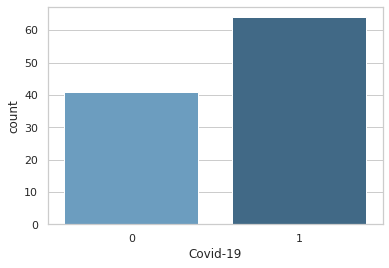

<Figure size 432x288 with 0 Axes>

In [17]:
sns.countplot("Covid-19", data=train_df, palette='Blues_d')
plt.show()
plt.savefig('count_plot')

In [18]:
count_nonCovid = len(train_df[train_df['Covid-19']==0])
count_Covid = len(train_df[train_df['Covid-19']==1])
pct_of_nonCovid = count_nonCovid/(count_nonCovid+count_Covid)
print("percentage of non Covid is", pct_of_nonCovid*100)
pct_of_Covid = count_Covid/(count_nonCovid+count_Covid)
print("percentage of Covid", pct_of_Covid*100)


percentage of non Covid is 39.04761904761905
percentage of Covid 60.952380952380956


In [19]:
train_df.groupby('Covid-19').mean()

,Temp(f),Pulse(bpm),Respiratory(/m),spo2
Covid-19,,,,
0,329.858537,83.243902,22.658537,94.536585
1,96.764062,87.265625,20.968750,93.109375


In [20]:
train_df.groupby('spo2').mean()

,Covid-19,Temp(f),Pulse(bpm),Respiratory(/m)
spo2,,,,
35,1.000000,97.200000,80.000000,20.000000
85,1.000000,96.600000,98.000000,22.000000
86,1.000000,97.400000,98.000000,20.000000
88,1.000000,99.000000,112.000000,24.000000
89,0.500000,97.650000,72.000000,23.000000
90,0.600000,97.840000,81.200000,21.200000
91,0.500000,97.500000,82.000000,20.000000
92,0.777778,97.955556,86.888889,20.888889
93,0.692308,98.076923,87.846154,21.384615


### Model Development and Prediction
Import the Scikit Learn Logistic Regression module 
Fit model on the train set using fit() then perform prediction on test set using prediction

In [21]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

In [26]:
file = open('model.pkl', 'wb')

In [28]:
import pickle
pickle.dump(logreg, file)
file.close()


### Evaluate model using confusion matrix
This is basically looking at how well your model did on predictions

In [22]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 6, 10],
       [ 5, 24]])

### Visualize CFM (confusion matrix) using a heatmap

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

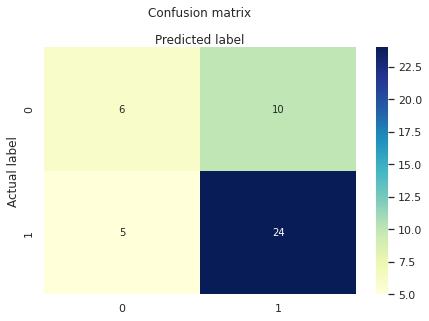

In [24]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### CFM evaluation metrics Accuracy, Precision, Recall

In [25]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.6666666666666666
Precision: 0.7058823529411765
Recall: 0.8275862068965517


### ROC (Receiver Operation Characteristic) Curve
Plotting true positive rate against false positie rate. Shows tradeoff between sensitivity and specificity. 

### What is AUC - ROC Curve? (credit https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5)
#### AUC - ROC curve 
Is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. By analogy, Higher the AUC, better the model is at distinguishing between patients with disease and no disease.

* The ROC curve is plotted with TPR against the FPR where TPR is on y-axis and FPR is on the x-axis.

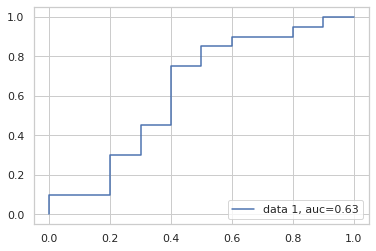

In [ ]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()